<a id="1"></a> <br>
# 1. Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<a id="1"></a> <br>
# 2. Import Dataset

In [2]:
data = pd.read_csv("/kaggle/input/ccdata/CC GENERAL.csv")

<a id="1"></a> <br>
# 3. Exploratory Data Analysis

In [3]:
data.sample(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7975,C18191,151.467852,0.750000,1554.52,1229.02,325.50,231.721336,0.750000,0.750000,0.625000,0.125000,1,27,1000.0,2224.113144,136.729435,1.0,8
1018,C11053,640.595851,1.000000,2496.57,1837.56,659.01,0.000000,0.500000,0.333333,0.166667,0.000000,0,14,3000.0,1145.707252,201.050218,0.0,12
1752,C11811,121.388989,0.545455,783.83,683.93,99.90,315.342982,0.416667,0.166667,0.333333,0.166667,3,7,7000.0,1778.900698,177.969765,1.0,12
3638,C13741,5368.192094,1.000000,4050.01,3863.11,186.90,4843.394482,0.666667,0.583333,0.166667,0.416667,13,32,13000.0,14290.996270,1337.235636,0.0,12
5252,C15399,1121.018433,1.000000,0.00,0.00,0.00,410.041428,0.000000,0.000000,0.000000,0.083333,2,0,1500.0,858.248769,296.752391,0.0,12


In [4]:
# checking missing values:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# checking nunique and type per columns:
df_nunique = pd.DataFrame([[col , data[col].nunique(),data[col].dtypes] for col in data.columns],columns=['col','nunique','type'])
df_nunique

,col,nunique,type
0,CUST_ID,8950,object
1,BALANCE,8871,float64
2,BALANCE_FREQUENCY,43,float64
3,PURCHASES,6203,float64
4,ONEOFF_PURCHASES,4014,float64
5,INSTALLMENTS_PURCHASES,4452,float64
6,CASH_ADVANCE,4323,float64
7,PURCHASES_FREQUENCY,47,float64
8,ONEOFF_PURCHASES_FREQUENCY,47,float64
9,PURCHASES_INSTALLMENTS_FREQUENCY,47,float64


In [6]:
numerical_features = [col for col in data.columns if data[col].dtypes!='object']

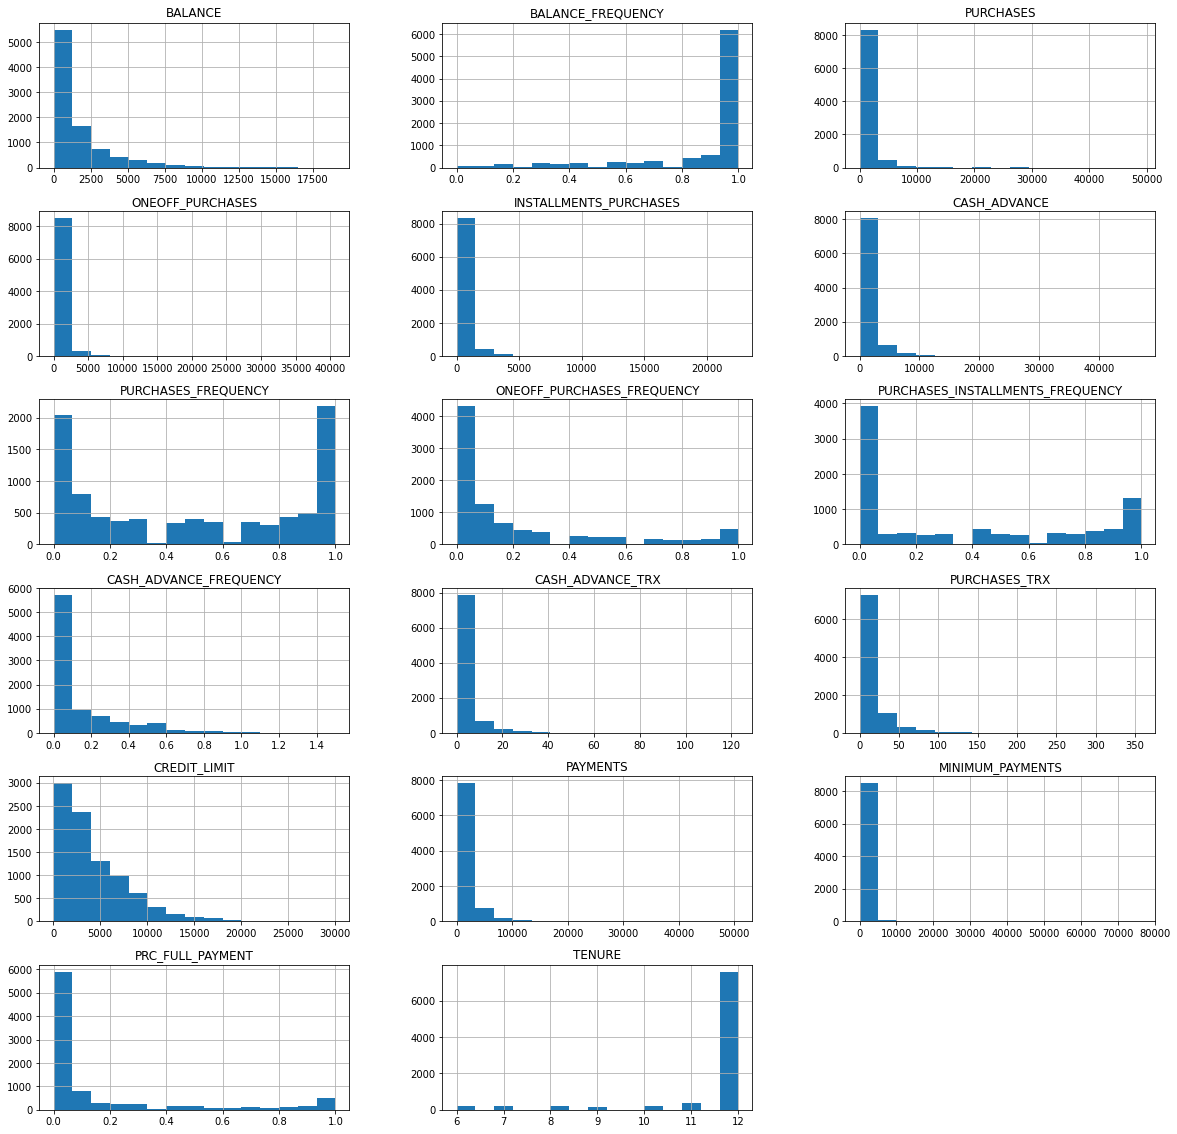

In [7]:
data[numerical_features].hist(bins=15, figsize=(20, 20), layout=(6, 3));

In [8]:
data = data.set_index('CUST_ID')

In [9]:
data.sample(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C11954,1106.697298,1.000000,1260.13,1260.13,0.00,0.000000,0.200000,0.200000,0.000000,0.000000,0,3,6500.0,1556.574701,238.440314,0.0,10
C10521,2516.753364,1.000000,606.62,598.95,7.67,0.000000,0.833333,0.833333,0.083333,0.000000,0,14,2750.0,1043.617154,1342.522124,0.0,12
C10265,22.189283,0.363636,234.16,0.00,234.16,0.000000,0.363636,0.000000,0.272727,0.000000,0,4,1500.0,479.910499,149.977816,0.5,11
C17862,2041.527181,1.000000,94.16,0.00,94.16,972.530598,0.083333,0.000000,0.083333,0.416667,12,1,2500.0,1073.025534,577.733132,0.0,12
C13463,1299.826045,1.000000,599.74,524.50,75.24,160.706720,0.250000,0.083333,0.166667,0.166667,2,5,1500.0,589.628198,489.936556,0.0,12


In [10]:
# fill the null values with the means:
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(),inplace=True)
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [11]:
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<a id="1"></a> <br>
# 4. Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
data1 = data.copy()
data_columns = data1.columns
feature = data1[data_columns]

In [14]:
data2 = data.copy()
data2[data_columns] = scaler.fit_transform(feature.values)

In [15]:
data2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.002148,0.818182,0.001945,0.000000,0.00424,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003979,0.001826,0.000000,1.0
C10002,0.168169,0.909091,0.000000,0.000000,0.00000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080893,0.014034,0.222222,1.0
C10003,0.131026,1.000000,0.015766,0.018968,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012264,0.008210,0.000000,1.0
C10004,0.087521,0.636364,0.030567,0.036775,0.00000,0.004366,0.083333,0.083333,0.000000,0.055555,0.00813,0.002793,0.248748,0.000000,0.011310,0.000000,1.0
C10005,0.042940,1.000000,0.000326,0.000393,0.00000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013374,0.003204,0.000000,1.0


<a id="1"></a> <br>
# 5. Modeling

**K-Means Clustering:**

K-Means is a clustering algorithm based on distance to determine the similarity of different points. It creates clusters by assigning points to the cluster nearest to them.

**Selecting the correct number of clusters using Elbow method:**

In [16]:
from sklearn.cluster import KMeans

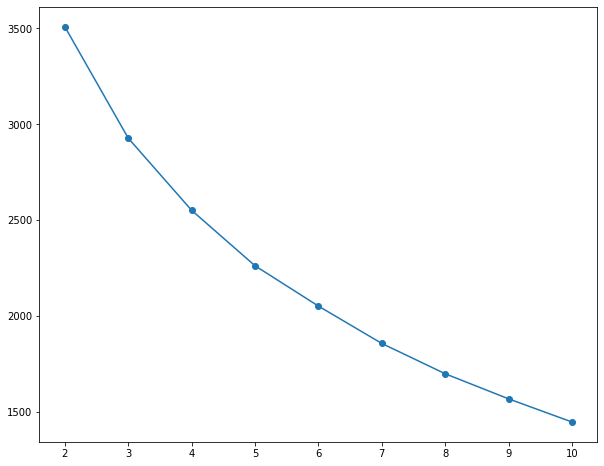

In [17]:
inertia = []
num_cluster = range(2,11)
for num in num_cluster:
    km = KMeans(n_clusters = num, random_state=0)
    km = km.fit(data2)
    inertia.append(km.inertia_)
plt.figure(figsize=(10,8))
plt.plot(num_cluster, inertia,marker='o')

When running the loop shown above, we notice that the elbow happens around 4-5 clusters, which would be a good approximation.

**Creating a 3D dataset with PCA:**

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=42)
data2_pca = pca.fit_transform(data2)

In [19]:
data2_pca_df = pd.DataFrame(data2_pca, columns = ['col1','col2','col3'])

**Applying K-Means with 4 clusters and visualizing the results with PCA decomposition:**

In [20]:
km = KMeans(n_clusters = 4, random_state=42).fit(data2)

In [21]:
labels = km.labels_
data2_pca_df['K_means_labels'] = labels

In [22]:
data2_pca_df.head()

,col1,col2,col3,K_means_labels
0,-0.482164,-0.097656,-0.046457,3
1,-0.608577,-0.019379,0.082143,3
2,0.304507,0.920946,0.012042,2
3,-0.588622,-0.005605,0.036900,3
4,-0.554354,0.052965,-0.084179,3


In [23]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

**Visualization:**

In [24]:
import plotly.express as px

fig = px.scatter_3d(data2_pca_df, x='col1', y='col2', z='col3',
              color=data2_pca_df['K_means_labels'])
fig.show()

We should first notice that the clusters are quite separated and the algorithm seems to be doing the cluster separation well, as the frontiers between clusters seem quite clear.

**Hierarchical Clustering:**

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
agg = AgglomerativeClustering(n_clusters = 4, affinity='euclidean',linkage='ward')
agg = agg.fit(data2)
labels = agg.labels_
data2_pca_df['agg_labels'] = labels

In [27]:
data2_pca_df

,col1,col2,col3,K_means_labels,agg_labels
0,-0.482164,-0.097656,-0.046457,3,1
1,-0.608577,-0.019379,0.082143,3,3
2,0.304507,0.920946,0.012042,2,2
3,-0.588622,-0.005605,0.036900,3,1
4,-0.554354,0.052965,-0.084179,3,3
...,...,...,...,...,...
8945,0.646921,-0.463044,0.210406,0,0
8946,0.549893,-0.406711,-0.214548,0,0
8947,0.360389,-0.422647,0.105921,0,0
8948,-0.646095,-0.204332,0.281793,3,1


**Visualization:**

In [28]:
import plotly.express as px

fig = px.scatter_3d(data2_pca_df, x='col1', y='col2', z='col3',
              color=data2_pca_df['K_means_labels'])
fig.show()

**Random Forest as a method to interpret clusters:**

We can make a Random Forest predict the labels of each cluster we have determined:

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [30]:
# Create df_kmeans and df_agg DataFrame
df_kmeans = data2.copy()
df_agg = data2.copy()

kmeans_labels = []
agg_labels = []

for i in data2_pca_df['K_means_labels']:
    kmeans_labels.append(i)
for i in data2_pca_df['agg_labels']:
    agg_labels.append(i)

df_kmeans.insert(17,'labels',kmeans_labels)
df_agg.insert(17,'labels',agg_labels)

In [31]:
X_kmeans = df_kmeans.drop('labels',axis=1)
y_kmeans = df_kmeans.labels

X_agg = df_agg.drop('labels',axis=1)
y_agg = df_agg.labels

In [32]:
X_kmeans_train,X_kmeans_test,y_kmeans_train,y_kmeans_test = train_test_split(X_kmeans,y_kmeans,test_size=0.25,random_state=42)

X_agg_train,X_agg_test,y_agg_train,y_agg_test = train_test_split(X_agg,y_agg,test_size=0.25,random_state=42)

In [33]:
RF = RandomForestClassifier(random_state=42)
RF_kmeans = RF.fit(X_kmeans_train,y_kmeans_train)
RF_agg = RF.fit(X_agg_train,y_agg_train)

**Using GridSearchCV to get best parameters:**

In [34]:
param_grid = { 
    'n_estimators': [25,50,100,200,300,400,500],
    'max_depth' : [4,5,6,7,8,9,10],
    'criterion' :['gini', 'entropy']
}

In [35]:
GSC_kmeans = GridSearchCV(RF_kmeans, param_grid,cv=5, n_jobs=-1)
GSC_kmeans = GSC_kmeans.fit(X_kmeans_train,y_kmeans_train)

GSC_agg = GridSearchCV(RF_agg, param_grid,cv=5, n_jobs=-1)
GSC_agg = GSC_agg.fit(X_agg_train,y_agg_train)

In [36]:
GSC_kmeans.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}

In [37]:
GSC_agg.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 400}

In [38]:
# Create Model:
RF_kmeans = RandomForestClassifier(n_estimators = 100,max_depth = 10,criterion = 'entropy',random_state=42)

RF_agg = RandomForestClassifier(n_estimators = 400,max_depth = 10,criterion = 'entropy',random_state=42)

In [39]:
RF_kmeans = RF_kmeans.fit(X_kmeans_train,y_kmeans_train)
RF_agg = RF_agg.fit(X_agg_train,y_agg_train)

In [40]:
y_pred_kmeans = RF_kmeans.predict(X_kmeans_test)
y_pred_agg = RF_agg.predict(X_agg_test)

In [41]:
# Measure Function:
def measure(y_true, y_pred):
    accuracy = round(accuracy_score(y_true, y_pred),4)
    recall = round(recall_score(y_true, y_pred,average='weighted'),4)
    precision = round(precision_score(y_true, y_pred,average='weighted'),4)
    f1 = round(f1_score(y_true, y_pred,average='weighted'),4)
    return pd.Series({'accuracy_score':accuracy,
                     'recall_score':recall,
                     'precision_score':precision,
                     'f1_score':f1})

In [42]:
measure(y_kmeans_test, y_pred_kmeans)

accuracy_score     0.9848
recall_score       0.9848
precision_score    0.9849
f1_score           0.9848
dtype: float64

In [43]:
measure(y_agg_test, y_pred_agg)

accuracy_score     0.9491
recall_score       0.9491
precision_score    0.9492
f1_score           0.9491
dtype: float64

**both modeles seems extremely accurate at predicting the values of the classes but kmeans is better, so we can expect the split points to be quite accurate as well.**